In [36]:
!pip install scipy


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

AttributeError: AttributeError: module 'scipy.sparse' has no attribute 'linalg'

In [9]:
df = pd.read_csv("hr_analitics.csv")
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [12]:
df['is_promoted'].value_counts()

0 50140
1 4668
Name: is_promoted, dtype: int64

Проверка на nan

In [13]:
df.isnull().any()

employee_id False
department False
region False
education True
gender False
recruitment_channel False
no_of_trainings False
age False
previous_year_rating True
length_of_service False
KPIs_met %gt;80% False
awards_won? False
avg_training_score False
is_promoted False
dtype: bool

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


изменяем nan на среднее значение в столбце

In [15]:
df['previous_year_rating'] = df['previous_year_rating'].fillna(df['previous_year_rating'].mean())

In [16]:
df.shape

(54808, 14)

категориальная переменная gender

In [17]:
df['gender'].unique()

array(['f', 'm'], dtype=object)

In [18]:
d = {'f': 0, 'm': 1}
df['gender'] = df['gender'].map(d)
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,0,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,1,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,1,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,1,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,1,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,1,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,0,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,1,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,1,sourcing,1,29,1.0,2,0,0,45,0


удаляем остатки nan

In [19]:
df = df.dropna()

In [20]:
df.shape

(52399, 14)

категориальная переменная education

In [21]:
df['education'].value_counts()

Bachelor's 36669
Master's & above 14925
Below Secondary 805
Name: education, dtype: int64

In [23]:
label_encoder = LabelEncoder()
label_encoder.fit(df['education'])
df['education'] = label_encoder.transform(df['education'])
df.head()

<ipython-input-23-ed078fe00138>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['education'] = label_encoder.transform(df['education'])


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,2,0,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,0,1,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,0,1,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,0,1,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,0,1,other,1,45,3.0,2,0,0,73,0


категориальная переменная recruitment_channel

In [55]:
df['recruitment_channel'].value_counts()

other 29061
sourcing 22204
referred 1134
Name: recruitment_channel, dtype: int64

In [24]:
label_encoder = LabelEncoder()
label_encoder.fit(df['recruitment_channel'])
df['recruitment_channel'] = label_encoder.transform(df['recruitment_channel'])
df.head()

<ipython-input-24-1f93de6873cf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recruitment_channel'] = label_encoder.transform(df['recruitment_channel'])


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,2,0,2,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,0,1,0,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,0,1,2,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,0,1,0,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,0,1,0,1,45,3.0,2,0,0,73,0


категориальная переменная department

In [25]:
df['department'].value_counts()

Sales & Marketing 15265
Operations 11122
Procurement 7066
Technology 7039
Analytics 5015
Finance 2500
HR 2386
Legal 1035
R&D 971
Name: department, dtype: int64

In [26]:
label_encoder = LabelEncoder()
label_encoder.fit(df['department'])
df['department'] = label_encoder.transform(df['department'])
df.head()

<ipython-input-26-0622a81ab23a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['department'] = label_encoder.transform(df['department'])


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,region_7,2,0,2,1,35,5.0,8,1,0,49,0
1,65141,4,region_22,0,1,0,1,30,5.0,4,0,0,60,0
2,7513,7,region_19,0,1,2,1,34,3.0,7,0,0,50,0
3,2542,7,region_23,0,1,0,2,39,1.0,10,0,0,50,0
4,48945,8,region_26,0,1,0,1,45,3.0,2,0,0,73,0


категориальная переменная region

In [27]:
df['region'].value_counts()

region_2 11497
region_22 6108
region_7 4624
region_15 2617
region_13 2592
region_26 2160
region_31 1841
region_4 1701
region_27 1575
region_16 1410
region_11 1291
region_28 1234
region_23 1147
region_29 975
region_19 864
region_32 861
region_20 849
region_14 804
region_17 787
region_25 785
region_5 759
region_6 676
region_10 644
region_30 644
region_8 642
region_1 596
region_24 507
region_12 498
region_21 403
region_9 372
region_3 344
region_34 292
region_33 269
region_18 31
Name: region, dtype: int64

In [28]:
label_encoder = LabelEncoder()
label_encoder.fit(df['region'])
df['region'] = label_encoder.transform(df['region'])
df.head()

<ipython-input-28-de7144b34d56>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['region'] = label_encoder.transform(df['region'])


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,2,0,2,1,35,5.0,8,1,0,49,0
1,65141,4,14,0,1,0,1,30,5.0,4,0,0,60,0
2,7513,7,10,0,1,2,1,34,3.0,7,0,0,50,0
3,2542,7,15,0,1,0,2,39,1.0,10,0,0,50,0
4,48945,8,18,0,1,0,1,45,3.0,2,0,0,73,0


матрица корреляции

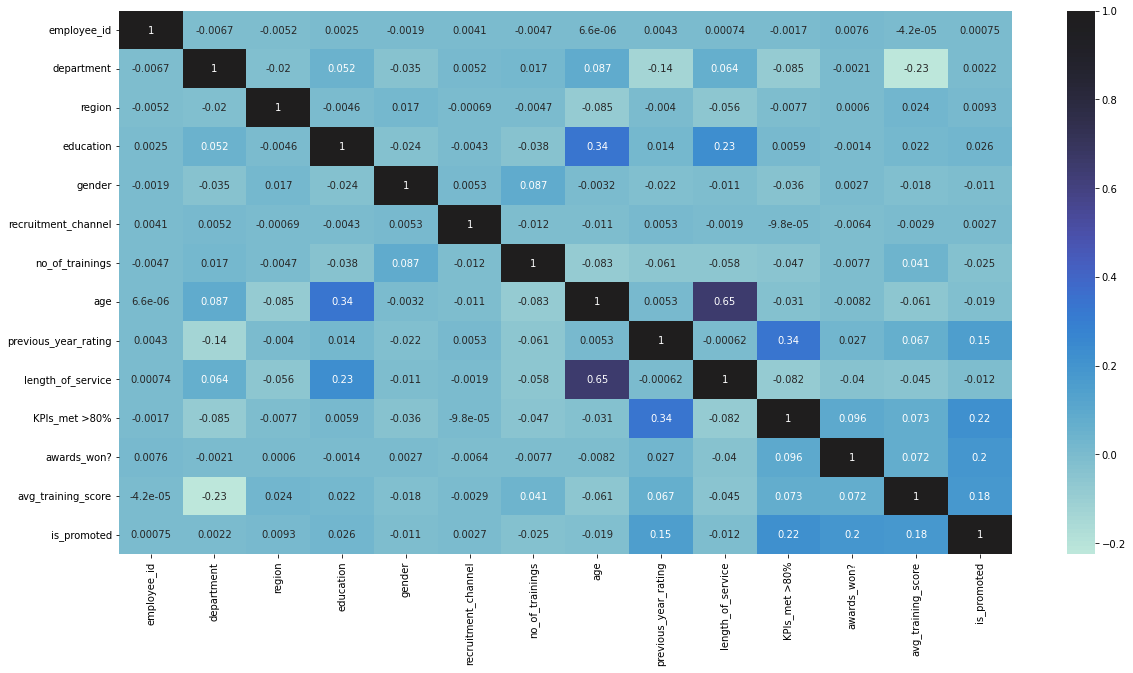

In [29]:
plt.figure(figsize=(20, 10))
cor = df.corr(numeric_only=True)
sns.heatmap(cor, annot=True, center=1)
plt.show()

In [30]:
x = df[['previous_year_rating', 'KPIs_met >80%', 'avg_training_score', 'awards_won?']]
#x = df[['previous_year_rating', 'KPIs_met >80%', 'avg_training_score', 'awards_won?', 'department', 'region', 'education', 'gender', 'recruitment_channel', 'no_of_trainings', 'age', 'length_of_service']]
y = df['is_promoted']

сплит на тест и трейн

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

обучение модели

In [32]:
model = LogisticRegression()
model.fit(x_train, y_train)

NameError: NameError: name 'LogisticRegression' is not defined

In [65]:
y_pred = model.predict(x_test)

коэффициенты

In [66]:
coefficients = model.coef_[0]
intercept = model.intercept_

for feature, coef in zip(x.columns, coefficients):
    print(feature, '-', coef)
print("intercept:", intercept)

previous_year_rating - 0.3229342401939138
KPIs_met >80% - 1.249217565059648
avg_training_score - 0.043384568578878235
awards_won? - 1.8434628057817926
intercept: [-7.17958361]


метрики

In [67]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9124045801526718
Precision: 0.5918367346938775
Recall: 0.06196581196581197
F1-score: 0.11218568665377177


матрица ошибок или confusion matrix

In [30]:
tn, fp, fn, tp = conf_matrix.ravel()

print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("TP:", tp)

TN: 9541
FP: 42
FN: 838
TP: 59
